In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Exploración Inicial del Dataset

df = pd.read_csv('datos.csv', encoding='latin-1')

print('La forma del dataset es', df.shape)

df.info()


#Se podría ver la relación entre años de experiencia y salario, edad y salario, edad y años de experiencia,
#edad y proyectos completados como posibles cortes de exploración y analisis


La forma del dataset es (50, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ï»¿ID_Empleado                 50 non-null     object 
 1   Edad                           50 non-null     int64  
 2   AÃ±os_Experiencia              50 non-null     int64  
 3   Departamento                   50 non-null     object 
 4   Nivel_Puesto                   50 non-null     object 
 5   Salario_USD                    50 non-null     int64  
 6   Horas_Extra_Mes                50 non-null     int64  
 7   Rendimiento_Anual              50 non-null     float64
 8   Satisfaccion_Laboral           50 non-null     int64  
 9   Proyectos_Completados          50 non-null     int64  
 10  Formacion_Continua             50 non-null     object 
 11  Tiempo_Promedio_Proyecto_Dias  50 non-null     int64  
 12  Horas_Capacitacion_

In [19]:
#2. Estadística Descriptiva
#el metodo describe muestra los datos estadisticos del dataset:

df.rename(columns={'AÃ±os_Experiencia':'Años_Experiencia'}, inplace=True)
df.describe()

,Edad,Años_Experiencia,Salario_USD,Horas_Extra_Mes,Rendimiento_Anual,Satisfaccion_Laboral,Proyectos_Completados,Tiempo_Promedio_Proyecto_Dias,Horas_Capacitacion_Anual,Distancia_Oficina_KM,Antiguedad_Meses
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,33.660000,7.740000,87240.000000,4.900000,8.502000,3.820000,11.880000,58.000000,25.480000,15.200000,92.880000
std,6.303902,5.446624,30927.538749,3.892693,0.788822,0.896478,4.255321,23.891763,14.314599,9.284615,65.359489
min,25.000000,1.000000,53000.000000,0.000000,7.300000,2.000000,5.000000,22.000000,3.000000,1.000000,12.000000
25%,28.250000,3.000000,60000.000000,2.000000,7.900000,3.000000,9.000000,39.250000,12.750000,7.250000,36.000000
50%,32.000000,6.000000,75500.000000,4.000000,8.300000,4.000000,10.500000,57.500000,25.500000,14.500000,72.000000
75%,38.000000,10.750000,107250.000000,7.750000,9.175000,4.000000,15.000000,71.500000,37.250000,20.750000,129.000000
max,47.000000,21.000000,165000.000000,13.000000,9.900000,5.000000,21.000000,110.000000,55.000000,34.000000,252.000000


In [5]:
#outliers
Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile(0.75)
IQR = Q3 - Q1

# Valores fuera del rango típico
outliers = df[(df['Edad'] < Q1 - 1.5 * IQR) | (df['Edad'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [ï»¿ID_Empleado, Edad, AÃ±os_Experiencia, Departamento, Nivel_Puesto, Salario_USD, Horas_Extra_Mes, Rendimiento_Anual, Satisfaccion_Laboral, Proyectos_Completados, Formacion_Continua, Tiempo_Promedio_Proyecto_Dias, Horas_Capacitacion_Anual, Distancia_Oficina_KM, Antiguedad_Meses, Rotacion]
Index: []


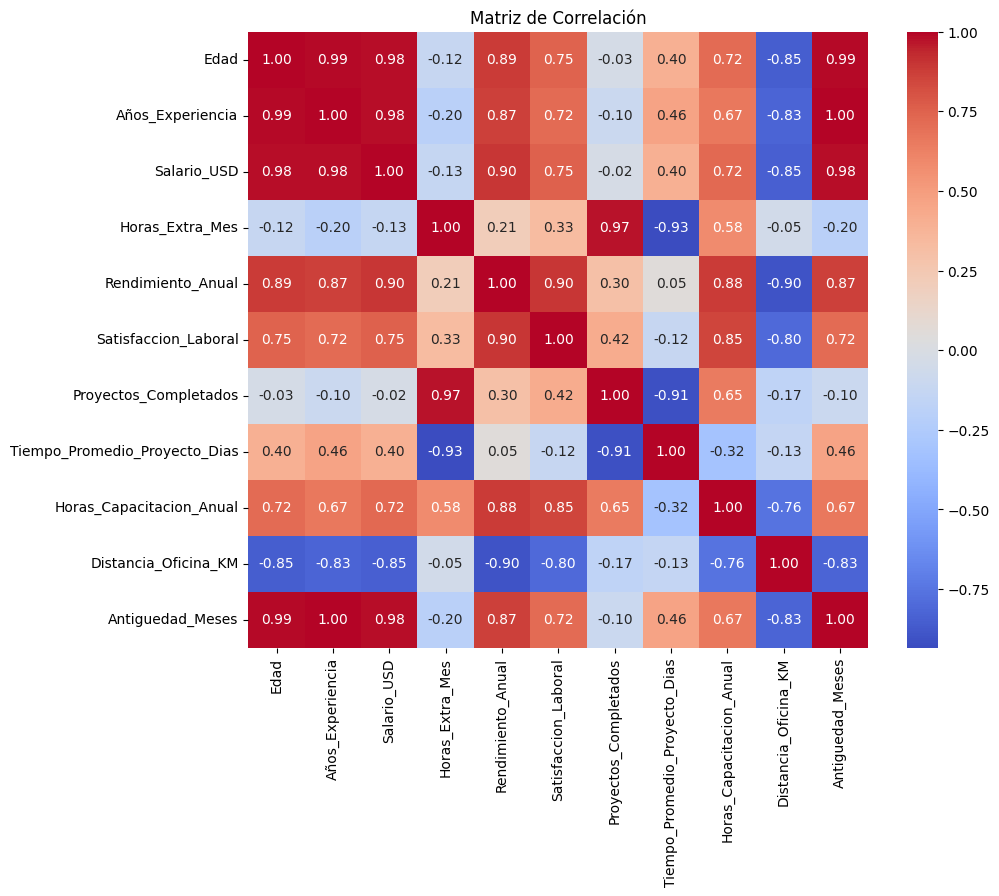

In [23]:
#matriz de correlacion
#Calcular la matriz de correlación entre variables numéricas.
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación"),
plt.show()
#Interesantes correlaciones:
#Satisfaccion laboral & Rendimiento anual, fuerte correlacion positiva de 0.9
#Horas de capacitacion anual y rendimiento. fuerte correlacion  positiva de 0.88
#Los proyectos completados casi no dependen de edad o salario, pero si tienen furte correlacion con Horas_extra_mes

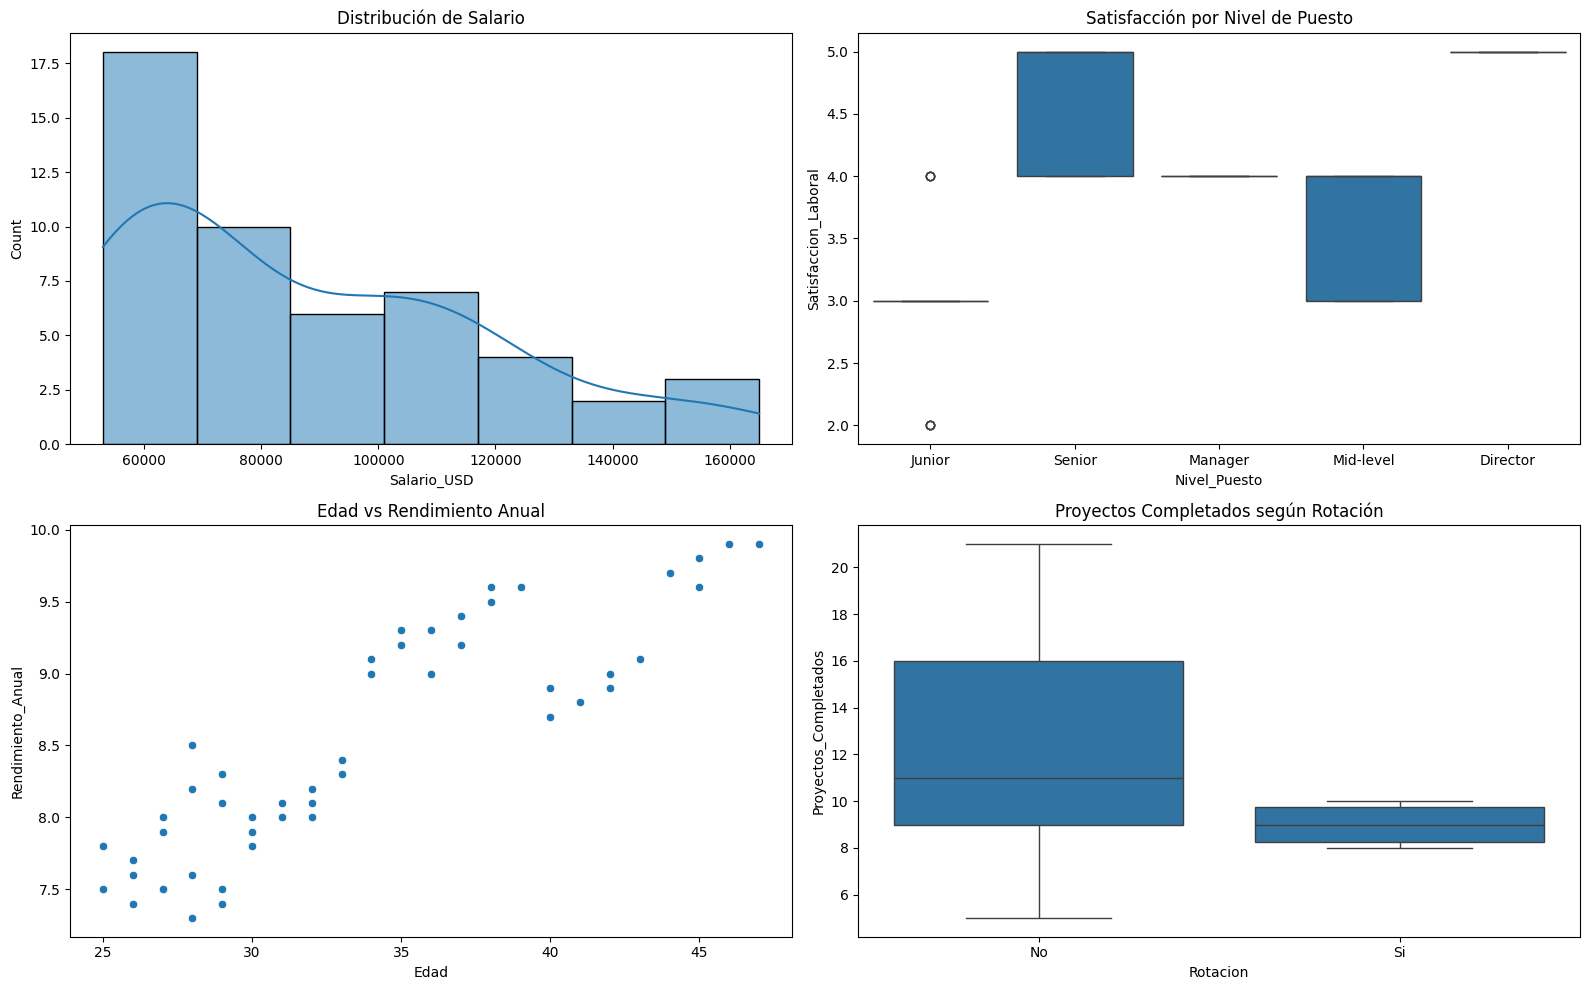

In [16]:
#visualizaciones
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# 1. Histograma de salario" - analisis de una variable numerica
sns.histplot(df['Salario_USD'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Salario')

# 2. Boxplot por nivel de puesto" - comparación entre variables categoricas y cuantitativas
sns.boxplot(data=df, x='Nivel_Puesto', y='Satisfaccion_Laboral', ax=axs[0, 1])
axs[0, 1].set_title('Satisfacción por Nivel de Puesto')

# 3. Dispersión Edad vs Rendimiento" - comparación entre dos variables numericas
sns.scatterplot(data=df, x='Edad', y='Rendimiento_Anual', ax=axs[1, 0])
axs[1, 0].set_title('Edad vs Rendimiento Anual')

# 4. Boxplot Proyectos vs Rotación" -  subgrupos de la población
sns.boxplot(data=df, x='Rotacion', y='Proyectos_Completados', ax=axs[1, 1])
axs[1, 1].set_title('Proyectos Completados según Rotación')

plt.tight_layout()
plt.show()

In [24]:
#Modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df[['Años_Experiencia']]
y = df['Salario_USD']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("Coeficiente:", model.coef_[0])
print("Intercepto:", model.intercept_)
print("R²:", r2_score(y, y_pred))

Coeficiente: 5581.3211155597755
Intercepto: 44040.57456556734
R²: 0.9661356553967798


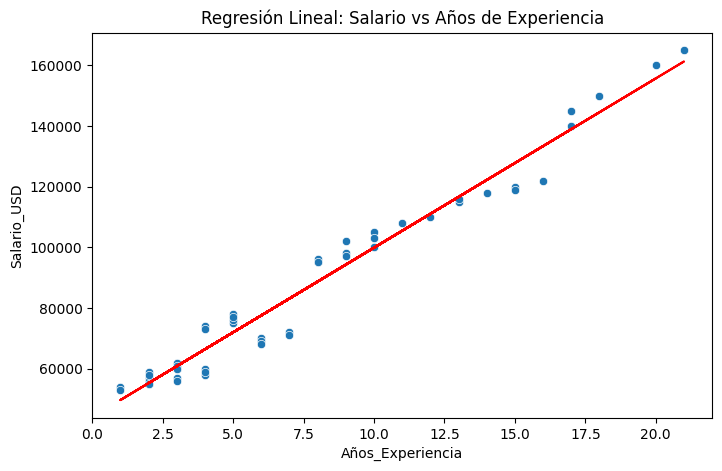

In [21]:
#Visualización

plt.figure(figsize=(8,5))
sns.scatterplot(x='Años_Experiencia', y='Salario_USD', data=df)
plt.plot(X, y_pred, color='red')
plt.title("Regresión Lineal: Salario vs Años de Experiencia")
plt.show()

**Objetivo del análisis:**
Explorar los datos sobre colaboradores de una empresa tecnológica;
Identificar factores que influyen en el rendimiento, satisfacción y rotación apoyandose en los datos de edad, años de experiencia y horas extra;
Posible aplicación de analisis: apoyar decisiones estratégicas de RRHH mediante evidencia cuantitativa.

**Principales hallazgos:**
1. Distribución de variables

- El salario promedio es de USD 87,240, con gran dispersión (desviación casi´de 80,000)

- La mayoría de los colaboradores tienen entre 25 y 40 años.

- Correlación lineal fuerte entre salario y años de experiencia.
- Mayor satisfaccion laboral para nivel Senior.

2. Visualizaciones clave

Histograma: distribución del salario con sesgo hacia valores altos.

Boxplot: mayor satisfacción en puestos senior y gerenciales; existencia de outliers para nivel junior apuntando a la necesidad de consolidación de trato y condiciones.

Dispersión: relación directa entre edad y rendimiento - mayor edad lleva a mayor rendimiento.

Boxplot: número signifitavamente menor de proyectos completados por empleados con rotación.

**Interpretación del modelo de regresión**
Modelo: Salario = 5581.32 × Años_Experiencia + 44,040.57

R² = 0.966 significa que el modelo explica el 96.6% de la variabilidad del salario.

Implica un aumento promedio de $5,581 USD por cada año adicional de experiencia.

**Conclusiones e insights**
- Variables como experiencia, edad y antigüedad están altamente correlacionadas con salario y rendimiento.

- La satisfacción laboral se relaciona fuertemente con el rendimiento anual, lo que en su lugar esta relacionado con antigüedad.

- Las personas con más proyectos y horas extra tienden a no rotar, sugiriendo motivación o compromiso.

- La empresa puede enfocarse en al desarrollo de talento junior y en beneficios para los roles medios para mejorar desempeño general y la satisfacción.
